<h1 align="center" > Event Classification with Layerwise Learning for Data Re-uploading Classifier in High Energy Physics
</h1>


<h1 align="center" style='font-family:font_family name'> Entangled_Nets </h1>

$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ [@eraraya-ricardo](https://github.com/eraraya-ricardo) $\;\;\;\;\;\;\;\;\;\;\;\;$ [@VoicuTomut](https://github.com/VoicuTomut)      $\;\;\;\;\;\;\;\;\;\;\;\;$ [@T0gan](https://github.com/T0gan)


------------

### Abstract


This project aims to use the method of modified layerwise learning[8] on data-reuploading classifier[6], where parametrized quantum circuit will be used as quantum classifiers to classify the SUSY dataset[1]. We managed to produce a better result using this approach compared to the previous related research[2] with less number of qubit. We obtained AUC of 0.8488 on testing dataset with 5000 training and testing samples, trained and tested using a simulator. We also tested to run the circuit on Rigetti's Aspen-9 QPU provided by AWS using the already optimized parameter to predict 2000 samples of test dataset and we obtained AUC of 0.8298.

### Introduction

The large experiments conducted in the field of particle physics require the detection and analysis of data produced in particle collisions that occurred using high-energy accelerators such as the LHC [2]. In these experiments, particles that are created by collisions are observed by layers of high-precision detectors surrounding the collision points, which produces large amounts of data about the collision. This motivated the use of "classical" machine learning techniques in different aspects to improve the performance and analysis of the data. 

Accordingly, these developed techniques are also adapted to quantum computing, e.g, the unfolding measurement distributions via quantum annealing [3]. Intending to take advantage of both fields, the techniques in quantum machine learning, which are considered as one of the quantum computing algorithms that could bring quantum advantages over classical methods [4][5], will be used where QML algorithms developed for gate based quantum hardware, in particular the algorithms based on variational quantum circuits. In variational quantum circuits, the classical data input is encoded into quantum states and a QPU is used to obtain and measure the quantum states which vary with some parameters. Exploiting a complex Hilbert space that grows exponentially with the number of qubits [2].

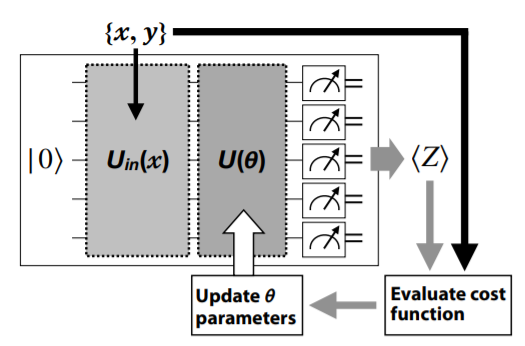

**Figure 1:** A Variational quantum circuit used for the event classification in [2]. Where {x, y} is a set of pairs composed of an             input data x and an input label y that is the desired output value. <Z\> is the output from the quantum circuit. </h1>

Furthermore, since the development of quantum hardware with a sufficient number of qubits is still in progress, circuits that make use of fewer qubits are more plausible to consider. Besides, such circuits may prove relevant even if they do not provide any quantum advantage, since they may be useful parts of larger circuits as a hybrid quantum-classical system. The classical components can be used to construct the encoding circuit or as an optimization method to extract the optimal parameters of the quantum circuit, such as the angles of the rotational gates. 

The quantum circuit will be responsible for computing the harder part of the classical classification algorithm such as the inner products required to obtain a kernel matrix. Next, the data will be classified directly by using a parametrized quantum circuit, whose variables are used to construct a cost function that should be minimized classically using optimizers in PennyLane [7]. This looks more convenient for the Near Intermediate Scale Quantum computation (NISQ) since it requires short-depth circuits, and its variational core makes it more resistant to experimental errors as expressed in [6].

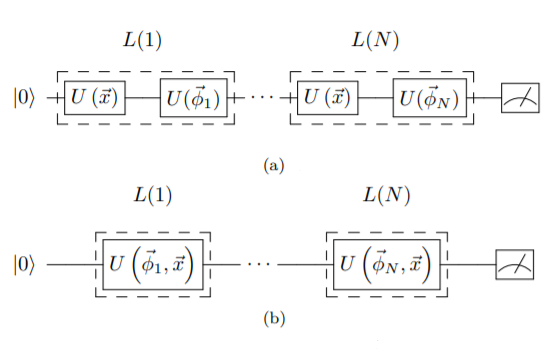

**Figure 2:** A Single-qubit classifier with data re-uploading. The quantum circuit is divided into layer gates L(i), which constitutes the classifier building blocks. In circuit (a), each of these layers is composed of a U(x) gate, which uploads the data plus a parametrized unitary gate U(φ). We apply this building block N times and finally compute a cost function that is related to the fidelity of the final state of the circuit with the corresponding target state of its class. This cost function may be minimized by tunning the φi parameters. Eventually, data and tunable parameters can be introduced with a single unitary gate, as illustrated in circuit (b) [6].

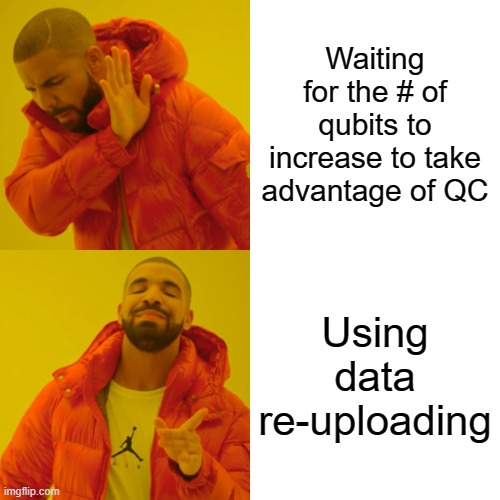

We will use the idea of data reuploading discussed by Pérez-Salinas et al.[6], where it is shown that it's possible to load a single qubit with arbitrary dimensional data and then use it as a universal quantum classifier.

We also use a modified version of the layerwise learning approach for parameterized quantum circuits, where individual components of a circuit are trained one by one, inspired by reference[8]. Only subsets of parameters are updated in each training step. This strategy can help avoid the problem of barren plateaus of the error surface due to the low depth of circuits, a low number of parameters trained in one step, and larger magnitude of gradients compared to training the full circuit as described in [8]. This approach also makes the model preferable for execution on noisy intermediate-scale quantum devices.

## Data visualization

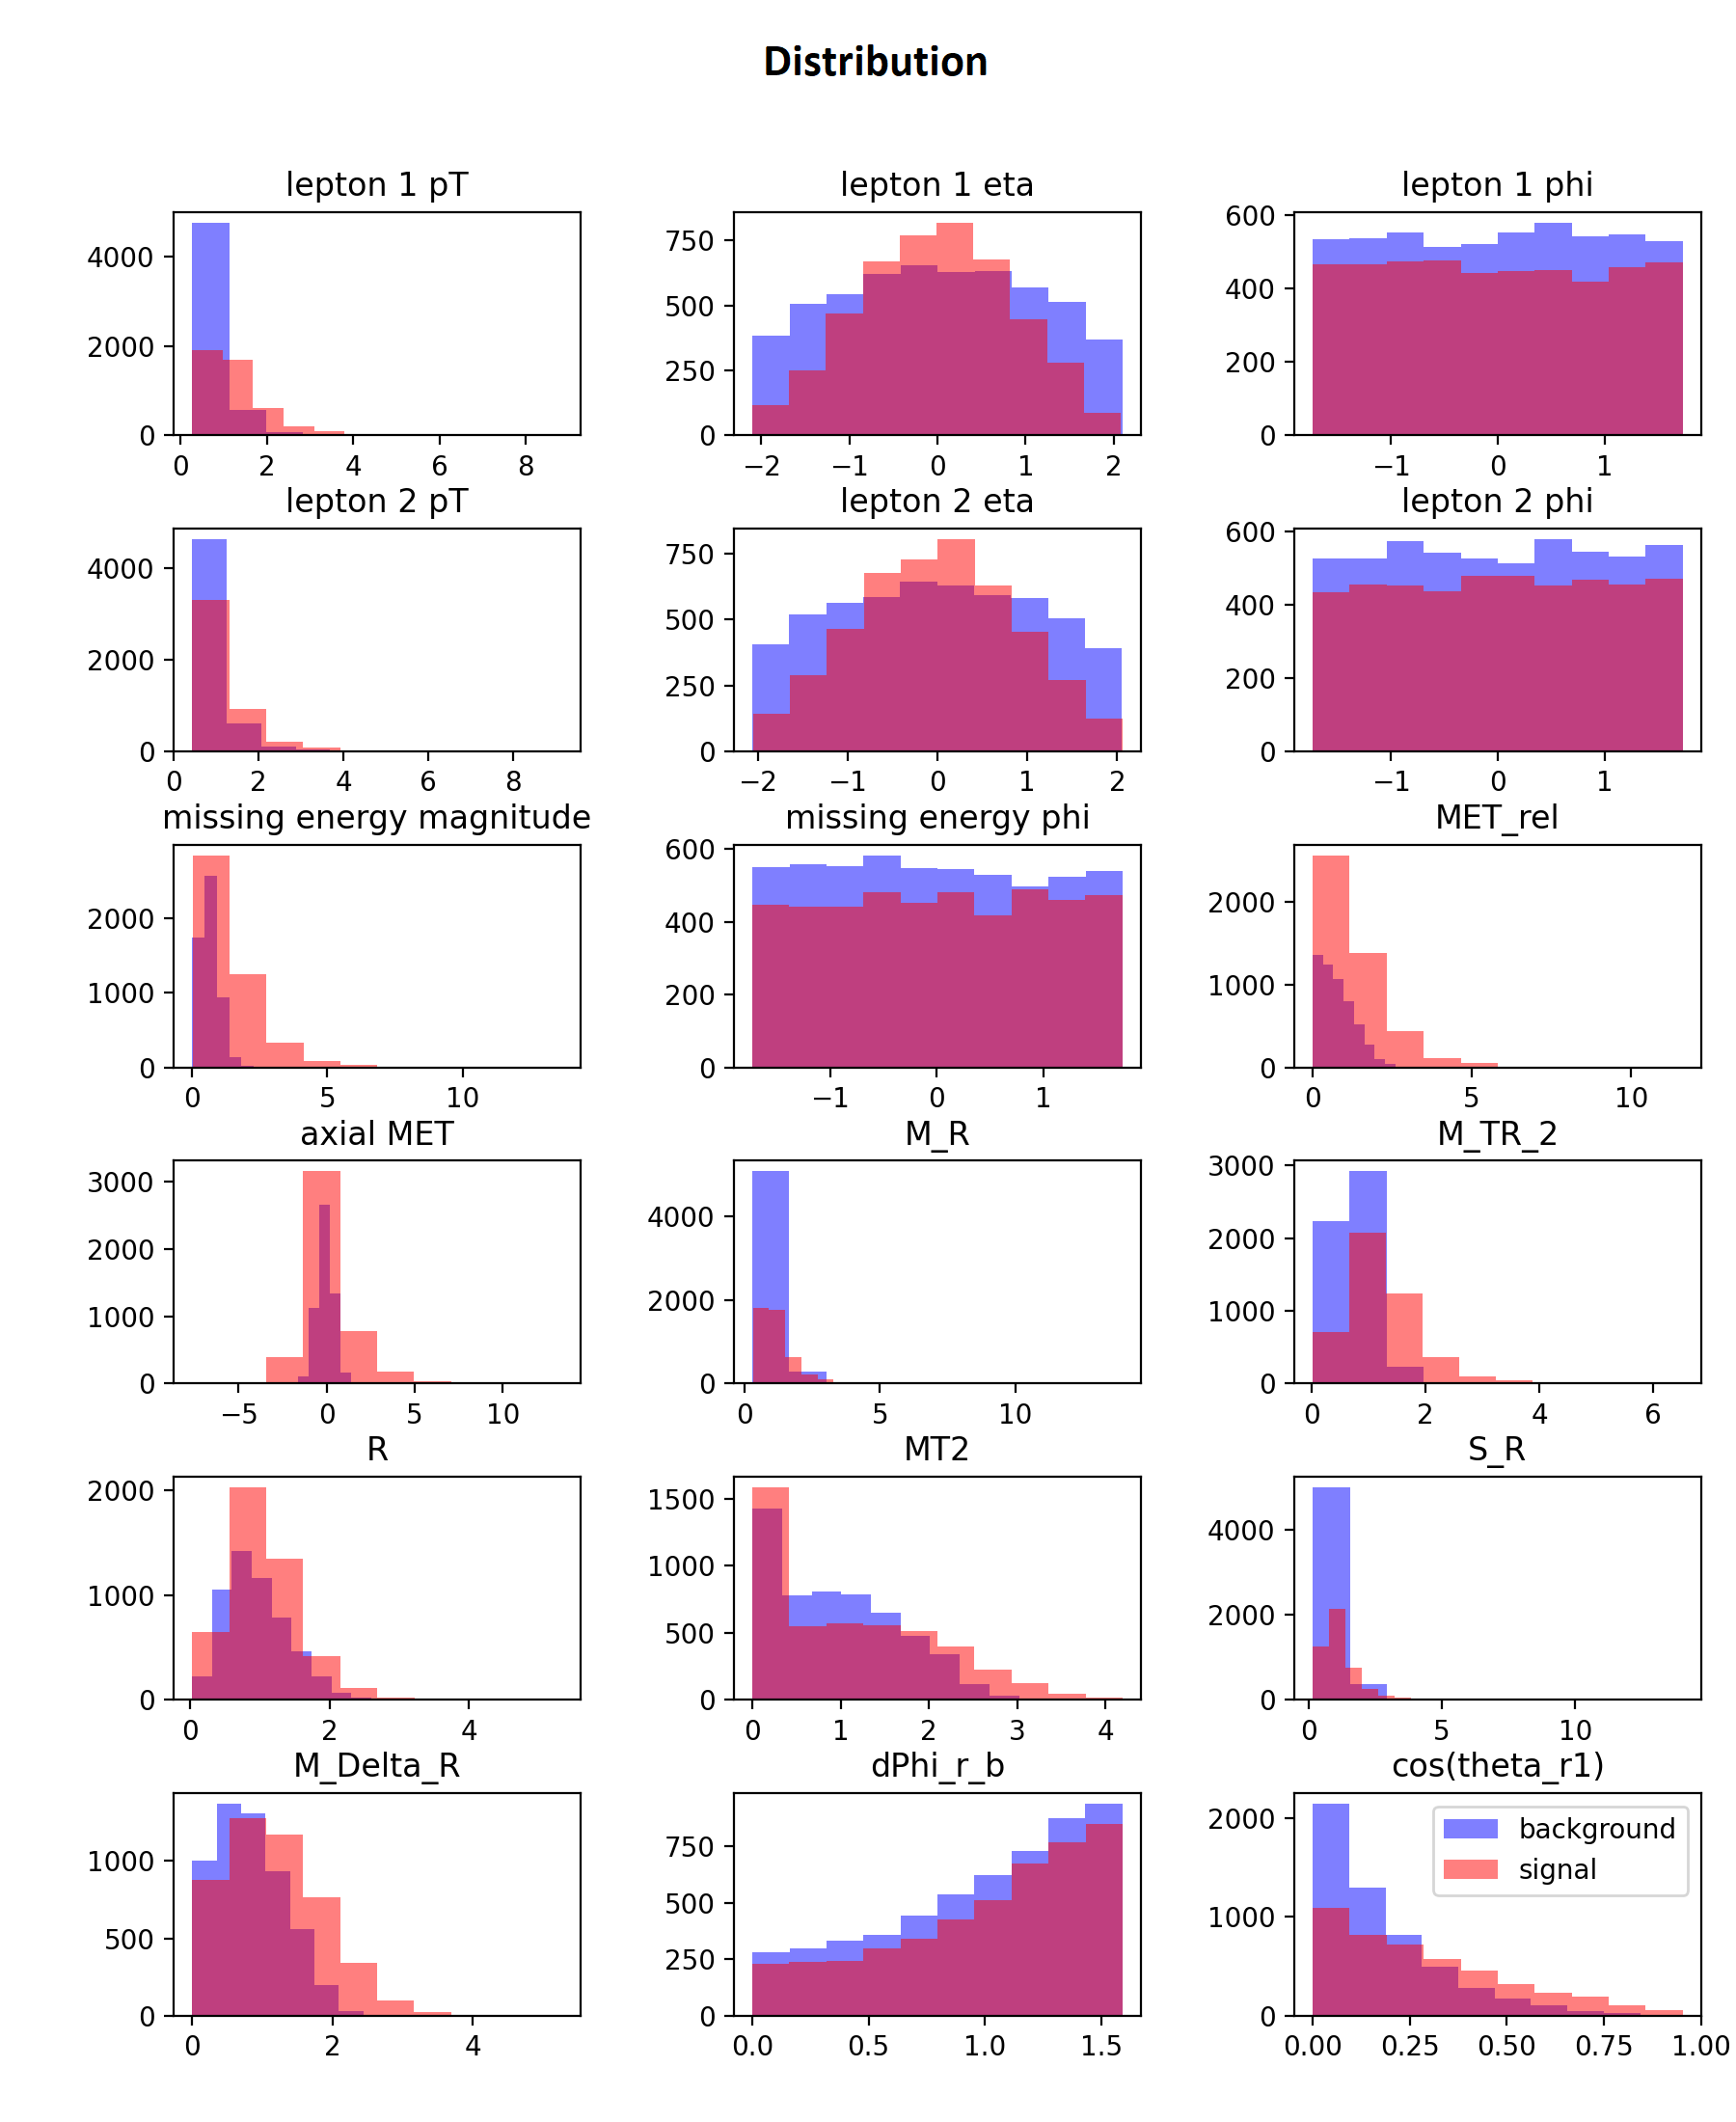

**Figure 3:** Visualization of the used SUSY dataset's parameters that were produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator, the remaining are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes [1].

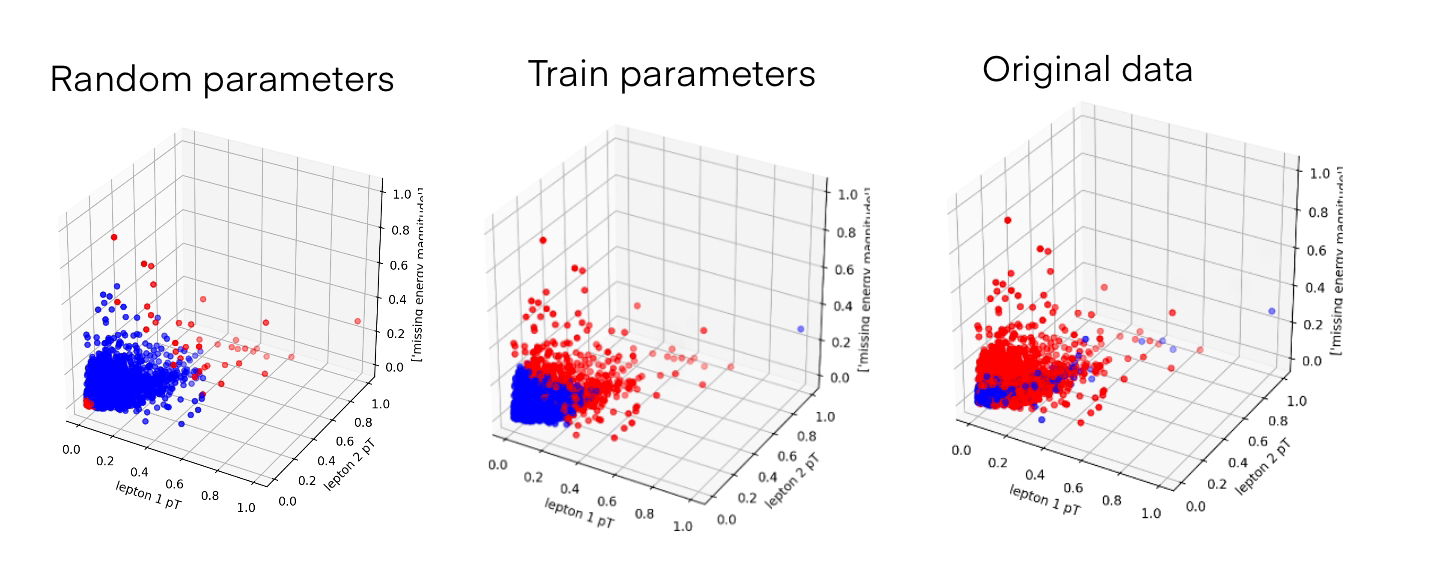

**Figure 4:** Data visulization in the space of some of the features. In order to increase the performance of the algorithm, the Principal Component Analysis (PCA) method was used.

# Code Implementation

## Load the Dataset

In this implementation, we only used a subset of the dataset, 5000 samples to be exact, both for the training set and testing set. This is done because of the limitation of computational resources that we have right now, training a quantum circuit for 5000000 samples takes a lot of resources and time. We feel that 5000 is a good number considering the reference [2] also only used a subset of the dataset up to 10000 samples.


Since we used the PennyLane's Rot gate for the Data Re-uploading Classifier (DRC)[6] scheme, it is nice and easy if the number of features is in multiple of three since every Rot gate needs 3 parameters. We decided to select the first 6 features from the list of best features mentioned in reference [2].

In the original paper of DRC, the author mentioned that we can embed the data with zeros if the number of features is not in multiple of three. It is definitely important to try to vary which (and how many) features being used in training to understand which features are more important. We decided that this is a work that we will do after the hackathon since we only have about 1 week and we need to give priority in finishing the model's training.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
# Every feature's name in the dataset
header_list = {
0: 'label',
1: 'lepton 1 pT',
2: 'lepton 1 eta',
3: 'lepton 1 phi',
4: 'lepton 2 pT',
5: 'lepton 2 eta',
6: 'lepton 2 phi',
7: 'missing energy magnitude',
8: 'missing energy phi',
9: 'MET_rel',
10: 'axial MET',
11: 'M_R',
12: 'M_TR_2',
13: 'R',
14: 'MT2',
15: 'S_R',
16: 'M_Delta_R',
17: 'dPhi_r_b',
18: 'cos(theta_r1)'
}


# Best features according to reference [2]
important_features = [
                      'lepton 1 pT',
                      'lepton 2 pT',
                      'missing energy magnitude',
                      'M_TR_2',
                      'M_Delta_R',
                      'lepton 1 eta',
                      'lepton 2 eta'
]

# The index of the best features in the header_list
important_features_id = np.array([
                         0,
                         3,
                         6,
                         11,
                         15,
                         1,
                         4
])

In [ ]:
# Load the dataset (can be obtained from reference [1])

# Note: please change the directory to the correct directory of the dataset if you want to run this code
dataset = pd.read_csv('~/SageMaker/SUSY_cut.csv', header=None)
dataset = dataset.rename(columns=header_list)
dataset.head(5)

/home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
1,0.0,0.9728614687919616,0.6538545489311217,1.1762245893478391,1.157156467437744,-1.7398731708526611,-0.8743090629577636,0.5677649974822998,-0.17500004172325134,0.8100607395172118,-0.2525521218776703,1.9218870401382449,0.8896374106407164,0.4107718467712402,1.145620822906494,1.9326320886611936,0.994464099407196,1.3678154945373535,0.04071449860930442
2,1.0,1.6679730415344238,0.06419061869382858,-1.225171446800232,0.5061022043228148,-0.33893898129463196,1.6725428104400635,3.475464344024658,-1.219136357307434,0.01295456290245056,3.7751736640930176,1.0459771156311035,0.568051278591156,0.4819284379482269,0.0,0.44841027259826655,0.20535576343536377,1.3218934535980225,0.3775840103626251
3,1.0,0.4448399245738983,-0.13429801166057587,-0.7099716067314148,0.4517189264297485,-1.6138712167739868,-0.7686609029769897,1.219918131828308,0.5040258169174193,1.8312475681304927,-0.4313853085041046,0.5262832045555115,0.9415140151977539,1.58753502368927,2.024308204650879,0.6034975647926331,1.5623739957809448,1.1354544162750244,0.18091000616550443
4,1.0,0.38125607371330256,-0.9761453866958617,0.6931523084640503,0.44895884394645685,0.8917528986930846,-0.6773284673690796,2.033060073852539,1.5330405235290527,3.0462598800659175,-1.0052847862243652,0.5693860650062561,1.0152113437652588,1.582216739654541,1.5519142150878906,0.7612152099609374,1.7154637575149536,1.492256760597229,0.09071890264749528


In [ ]:
# Convert it to numpy
dataset = dataset.to_numpy()

# Sepparating the label (Y) from the input features (X)
Y = dataset[:, 0]
Y = np.array(Y, dtype=int)
X = dataset[:, 1:]

# Sanity check
print(X.shape, Y.shape)

In [ ]:
# Separate data with label 0 and label 1

x_0 = X[Y == 0, :]
x_1 = X[Y == 1, :]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

# Sanity check
print(x_0.shape, y_0.shape)
print(x_1.shape, y_1.shape)

In [ ]:
# Split 50% of the data for training set and 50% for testing set

x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_0, y_0, test_size=0.5, random_state=2021)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.5, random_state=2021)

In [ ]:
num_sample = 2500 # sample per class, total = 5000

# Take the first 5000 samples (2500 from each class) from training set for X_train and Y_train
X_train = np.concatenate((x_train_0[:num_sample, :], x_train_1[:num_sample, :]), axis=0)
Y_train = np.concatenate((y_train_0[:num_sample], y_train_1[:num_sample]), axis=0)

# Take the first 5000 samples (2500 from each class) from testing set for X_test and Y_test
X_test = np.concatenate((x_test_0[:num_sample, :], x_test_1[:num_sample, :]), axis=0)
Y_test = np.concatenate((y_test_0[:num_sample], y_test_1[:num_sample]), axis=0)

# Sanity Check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

In [ ]:
# Save the 5000 subset as a txt file for future use so we don't need to load the whole dataset each time

np.savetxt('./SUSY Dataset/X_train_5000.txt', X_train)
np.savetxt('./SUSY Dataset/X_test_5000.txt', X_test)
np.savetxt('./SUSY Dataset/Y_train_5000.txt', Y_train)
np.savetxt('./SUSY Dataset/Y_test_5000.txt', Y_test)

In [4]:
# Code to load the saved subset

num_sample = 5000

X_train = np.loadtxt('./SUSY Dataset/X_train_' + str(num_sample) + '.txt')
Y_train = np.loadtxt('./SUSY Dataset/Y_train_' + str(num_sample) + '.txt')

X_test = np.loadtxt('./SUSY Dataset/X_test_' + str(num_sample) + '.txt')
Y_test = np.loadtxt('./SUSY Dataset/Y_test_' + str(num_sample) + '.txt')

# Sanity Check
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5000, 18) (5000,)
(5000, 18) (5000,)


In [7]:
# Take only the best 6 features

X_train = X_train[:, important_features_id[:6]]
X_test = X_test[:, important_features_id[:6]]

X_train.shape, X_test.shape

((5000, 6), (5000, 6))

## Training the Quantum Circuit in Simulator

In [11]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

qml.enable_tape()


# Set a random seed
np.random.seed(42)

### The Circuit Architecture

In our implementation, we used DRC scheme with 1 qubit. Below is the schematic of one layer of the circuit that we trained.

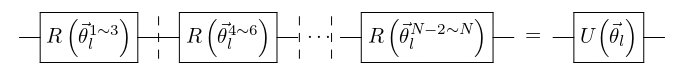

$$
\begin{array}{l}
\vec{\theta}_{l}^{n \sim n+2}=\left(\theta_{l}^{n}, \theta_{l}^{n+1}, \theta_{l}^{n+2}\right) \\
\vec{\theta}_{l}=\left(\theta_{l}^{1}, \theta_{l}^{2}, \theta_{l}^{3}, \ldots, \theta_{l}^{N}\right)
\end{array}
$$

$$
\theta_{l}^{n}=w_{l}^{n} x^{n}+b_{l}^{n}
$$

where $x$ is one sample of data, $w$ and $b$ is the weight and bias parameter that will be optimized during the training, $n$ is the feature index (for example, $n=1$ means the value of the first feature of the sample $x$), $N$ is the total number of features of the sample $x$, and $l$ is the index of layer (for example, $l=1$ means the first layer).

This circuit can then be repeated for several layers. Below is the schematic of the circuit with $L$ number of layers.

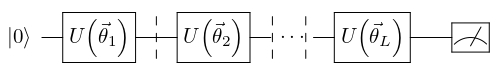

In this implementation, we set $L=5$.

How we measured the circuit will be explained in the next part (*The Cost Function*).

### The Cost Function

We followed the weighted fidelity cost function proposed by the authors of the DRC[6]. Since there are two class of labels (0 and 1) in the dataset, we represented the label 0 as $|0\rangle$ and the label 1 as $|1\rangle$ as they are maximally orthogonal points in the Bloch sphere for two class case.

Then, the cost function for one batch of training can be written as
$$
J\left(\vec{\alpha}, \vec{\theta}\right)=\frac{1}{2M} \sum_{m=1}^{M} \operatorname{sum}\left\{\left(\vec{y}_{\text {pred }_{m}}(\vec{\alpha}, \vec{\theta})-\vec{y}_{\text {true }_{m}}\right)^{2}\right\}
$$

$$
\vec{y}_{\text{pred}_{m}}(\vec{\alpha}, \vec{\theta}) =
\vec{\alpha}
\odot
\left[\begin{array}{c}
\left\langle O_{0}(\vec{\theta})\right\rangle \\
\left\langle O_{1}(\vec{\theta})\right\rangle
\end{array}\right]
$$

$$
\langle O_{0}(\vec{\theta})\rangle=\langle\Psi_{D R C}(\vec{\theta})|O_{0}| \Psi_{D R C}(\vec{\theta})\rangle=\langle\Psi_{D R C}(\vec{\theta})|0\rangle\langle 0| \Psi_{D R C}(\vec{\theta})\rangle=|\langle 0|\Psi_{D R C}(\vec{\theta})\rangle|^2
$$

$$
\langle O_{1}(\vec{\theta})\rangle=\langle\Psi_{D R C}(\vec{\theta})|O_{1}| \Psi_{D R C}(\vec{\theta})\rangle=\langle\Psi_{D R C}(\vec{\theta})|1\rangle\langle 1| \Psi_{D R C}(\vec{\theta})\rangle=|\langle 1|\Psi_{D R C}(\vec{\theta})\rangle|^2
$$

$$
\vec{\alpha} = \left[\begin{array}{c}
\alpha_{0} \\
\alpha_{1}
\end{array}\right]
$$

$$
|\Psi_{D R C}(\vec{\theta})\rangle=U(\vec{\theta}_{L})U(\vec{\theta}_{L-1})\ldots U(\vec{\theta}_{1})|0\rangle
$$
where $m$ is the index of data sample (for example, $m=1$ means the first sample from the batch), $M$ is the total number of samples in one batch, $\vec{\theta_{l}}$ is the same as discussed in the previous section (*The Circuit Architecture*), $\vec{\alpha}$ is the weight vector that will also be optimized during the training.

In this case, we need to measure the circuit twice for every sample of data, once using observable $|0\rangle\langle 0|$ and once using observable $|1\rangle\langle 1|$. To make the code cleaner and easier, we decided to use two qubits instead. Both qubits will be operated by the same gates (with the same parameters and sample), but the first qubit is measured by the observable $|0\rangle\langle 0|$ and the second qubit is measured by the observable $|1\rangle\langle 1|$. The final result will be exactly the same as measuring one qubit two times with two different observables.

This code below will set up the observables needed.

In [9]:
# Define output labels as quantum state vectors
label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

state_labels = [label_0, label_1]
dm_labels = [density_matrix(state_labels[i]) for i in range(2)]

### The Training Process

We used Keras to optimized the parameters by turning PennyLane's QNode as a Keras layer. The training is carried out layer by layer as inspired by reference [8].

We first initialize all the weights randomly. We then trained the $\vec{\theta_{l}}$ parameter layer by layer, from the first layer until the last layer $L=5$.

When we trained the $k$ layer, we kept all parameters in the other layer ($\vec{\theta_{l\neq k}}$) as constant and only optimized the $\vec{\theta_{k}}$. The weight vector $\vec{\alpha}$ is still being optimized. The value of the parameters after each epoch is saved. After the training is done, we kept the parameter $\vec{\theta_{k}}$ from the saved files that gives the best balance between train and test/validation accuracy to avoid overfitting as well as underfitting, and discard the rest. We also discard the weight vector $\vec{\alpha}$. We re-initialized the weight vector $\vec{\alpha}$ randomly, and continued training the next layer. This process is repeated until all parameters in every layer is trained.

After that, we again re-initialized the weight vector $\vec{\alpha}$ randomly (but not the $\vec{\theta}$ parameters) and then trained all parameters at once for the last time. The value of the parameters after each epoch is saved. Just like before, we then kept the the parameters from the saved files that gives the best balance between train and test/validation accuracy. This final parameters will be called as the best parameters.

#### The Hyperparameters

In this implementation, we used these hyperparameters:
1. Optimizer: Adam Optimizer with learning rate = 0.05, $\beta_{1}=0.9$, $\beta_{2}=0.999$, $\epsilon=10^{-7}$
2. Batch size: 128 samples per batch
3. Maximum epoch: 10 epochs

Let's start the training process.

Below is the code for the custom layer for the weight vector $\vec{\alpha}$.

In [12]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 2), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

Initializes the initial parameters

In [13]:
num_fc_layer = 5 # number of layer
params_fix = np.random.uniform(size=(2, num_fc_layer, 6))

#### Training the 1st Layer

In [ ]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)
layer_id = 0 # the layer index to be trained, it starts from zero because of Numpy convention

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params_fix[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              if l == layer_id: # train only the specified layer
                qml.Rot(*(params[0][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][3*g:3*(g+1)]), wires=q)
              else:
                qml.Rot(*(params_fix[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params_fix[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [ ]:
n_component = 6 # number of features used

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=0)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=0)_set5000_10epoch_saved-model-08.hdf5')


# keep that parameters and replace the initial one
params_layer_0 = model.get_weights()[0]
params_fix[:, 0, :] = params_layer_0

#### Training the 2nd Layer

In [ ]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)
layer_id = 1 # the layer index to be trained, it starts from zero because of Numpy convention

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params_fix[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              if l == layer_id: # train only the specified layer
                qml.Rot(*(params[0][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][3*g:3*(g+1)]), wires=q)
              else:
                qml.Rot(*(params_fix[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params_fix[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [ ]:
n_component = 6 # number of features used

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=1)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=1)_set5000_10epoch_saved-model-08.hdf5')


# keep that parameters and replace the initial one
params_layer_1 = model.get_weights()[0]
params_fix[:, 1, :] = params_layer_1

#### Training the 3rd Layer

In [ ]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)
layer_id = 2 # the layer index to be trained, it starts from zero because of Numpy convention

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params_fix[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              if l == layer_id: # train only the specified layer
                qml.Rot(*(params[0][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][3*g:3*(g+1)]), wires=q)
              else:
                qml.Rot(*(params_fix[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params_fix[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [ ]:
n_component = 6 # number of features used

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=2)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=2)_set5000_10epoch_saved-model-08.hdf5')


# keep that parameters and replace the initial one
params_layer_2 = model.get_weights()[0]
params_fix[:, 2, :] = params_layer_2

#### Training the 4th Layer

In [ ]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)
layer_id = 3 # the layer index to be trained, it starts from zero because of Numpy convention

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params_fix[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              if l == layer_id: # train only the specified layer
                qml.Rot(*(params[0][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][3*g:3*(g+1)]), wires=q)
              else:
                qml.Rot(*(params_fix[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params_fix[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [ ]:
n_component = 6 # number of features used

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=3)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=3)_set5000_10epoch_saved-model-08.hdf5')


# keep that parameters and replace the initial one
params_layer_3 = model.get_weights()[0]
params_fix[:, 3, :] = params_layer_3

#### Training the 5th Layer

In [ ]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)
layer_id = 4 # the layer index to be trained, it starts from zero because of Numpy convention

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params_fix[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              if l == layer_id: # train only the specified layer
                qml.Rot(*(params[0][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][3*g:3*(g+1)]), wires=q)
              else:
                qml.Rot(*(params_fix[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params_fix[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [ ]:
n_component = 6 # number of features used

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=4)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=4)_set5000_10epoch_saved-model-08.hdf5')


# keep that parameters and replace the initial one
params_layer_4 = model.get_weights()[0]
params_fix[:, 4, :] = params_layer_4

#### Final Training

In [14]:
n_qubits = 2  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): 1-d input vector (data sample)

    Returns:
        array[float]: 1-d output vector in the form of [alpha0*<O0>, alpha1*<O1>]
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
              qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [15]:
n_component = 6

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum Layer
num_fc_layer = 5
q_fc_layer = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_component)}, output_dim=2)(X)

# Alpha Layer
alpha_layer = class_weights()(q_fc_layer)

model = tf.keras.Model(inputs=X, outputs=alpha_layer)

In [16]:
# view each of the layer's name and its specifications
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 6)]               0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 2)                 60        
_________________________________________________________________
class_weights (class_weights (None, 2)                 2         
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model(X_train[0:3])

# set the initial weights to the params_fix that has been optimized layer by layer
# Note: please change the name of the keras layer accordingly based on the model.summary()
model.get_layer('keras_layer').set_weights([params_fix])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [ ]:
# Note: please put the correct directory to save the weights accordingly if you want to run the code
filepath = "./Model/Best6_layer5(layer_id=all)_set5000_10epoch_saved-model-{epoch:02d}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                                save_weights_only=True, save_best_only=False, mode='auto')

In [ ]:
H = model.fit(X_train, to_categorical(Y_train), epochs=10, batch_size=128, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test)), verbose=1,
              callbacks=[checkpoint])

In [ ]:
# load the parameters that is considered giving the best balance between train and test accuracy
model.load_weights('./Model/Best6_layer5(layer_id=all)_set5000_10epoch_saved-model-08.hdf5')


# keep the parameters as the best params, also keep the weight vector alpha
best_params = model.get_weights()[0]
alpha = model.get_weights()[1]

### Testing the Performance

After training process, this is the list of parameters and the weight vector $\vec{\alpha}$ that we got

In [17]:
best_params = np.array([[[ 0.7079311 ,  0.37632585, -0.33214605, -0.13929626,
          -0.7721329 , -0.5372071 ],
         [-0.29678243,  0.01558876, -0.24696895,  0.17431983,
          -0.12074132,  0.37094465],
         [-0.40574065, -0.04427808,  1.0555736 , -0.81905687,
          -1.0446428 ,  0.05147649],
         [-0.49339634, -0.57406455,  0.50634474, -0.4733748 ,
           0.29814383,  0.3295614 ],
         [ 1.2720922 ,  0.2524813 ,  0.7091267 , -0.12986897,
           0.20881489, -0.7476898 ]],
 
        [[ 0.5376858 , -1.1241286 ,  2.0380347 ,  2.3011663 ,
          -0.61580783,  0.5203443 ],
         [ 0.7615255 , -2.1535773 , -0.9438669 , -0.7446632 ,
          -0.8937272 ,  0.5636517 ],
         [-0.15026595,  1.9657563 , -0.31717998, -0.6812052 ,
          -1.3080239 , -0.09160299],
         [ 0.981377  ,  1.6538823 , -0.38690042,  0.7046689 ,
           0.03279989, -0.15615936],
         [-0.532189  , -0.27468985, -0.04790952, -1.2638885 ,
          -0.93331784, -0.3911027 ]]])

alpha = np.array([0.94681466, 1.0617169 ])

In [18]:
# view each of the layer's name and its specifications
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 6)]               0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 2)                 60        
_________________________________________________________________
class_weights (class_weights (None, 2)                 2         
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [20]:
# load the parameters to the model
# Note: please change the name of the keras layer accordingly based on the model.summary()
model.get_layer('keras_layer').set_weights([best_params])
model.get_layer('class_weights').set_weights([np.array([alpha])])

The metric we will be using is the Area Under the Receiver Operating Characteristics Curve (AUC), the same metric that is used in the reference [2].

The output from the model is in the form of $[\alpha_{0}\langle O_{0}\rangle, \alpha_1\langle O_{1}\rangle]$ for every sample. To decide which label the model predicts into, we just consider the $\alpha_1\langle O_{1}\rangle$ value during test/inference time since it will gives how confident the model is in predicting a positive label (label = 1).

In [21]:
from sklearn.metrics import roc_auc_score

AUC for training set

In [24]:
Y_pred_train = model.predict(X_train)
roc_auc_score(Y_train, Y_pred_train[:, 1])

0.8532208

AUC for testing set

In [23]:
Y_pred_test = model.predict(X_test)
roc_auc_score(Y_test, Y_pred_test[:, 1])

0.8488144000000002

### Testing the Optimized Parameters on Real Hardware

After we obtained the optimized parameters, we tested the model to do inference on testing set. We used Rigetti — Aspen-9 QPU provided by AWS.

In [ ]:
device_rigetti = "arn:aws:braket:::device/qpu/rigetti/Aspen-9"

# Note: please change the s3 directory accordingly based on your account if you want to run the code
my_bucket = f"amazon-braket-edo" # the name of the bucket
my_prefix = "edo-testing" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

To save cost, we made the model predicts 10 data samples directly for every task/execution. To do this, we created a circuit of 10 qubits, where each qubit act as a single DRC.

The parameters used is the same for every qubit, which is the best parameters, but the data sample is different for every qubit. At the end of the circuit, all qubit is measured with Pauli-Z gate since Rigetti device plugin in PennyLane doesn't support custom Hermitian observable (at the time of the hackathon). This is not a problem since we can still get the measurement result we wanted by applying this equation

$$
\langle O_{1}\rangle = \langle (|1\rangle \langle 1|) \rangle = \frac{1 - \langle Z\rangle}{2}
$$

In [ ]:
n_samples = 10
n_qubits = n_samples  # number of samples tested

dev_rigetti_aws = qml.device('braket.aws.qubit', device_arn=device_rigetti, shots=10000, wires=n_qubits, s3_destination_folder=s3_folder)


@qml.qnode(dev_rigetti_aws)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs (array[float]): array of inputs (data samples)

    Returns:
        array[float]: 1-d output vector in the form of <Z> for every qubit
    """
    
    #print(len(inputs))
    #print(len(params[0]))
    #print(int(len(inputs[0])/3))
    # data sample iteration
    for data in range(len(inputs)):
        # layer iteration
        for l in range(len(params[0])):
            # qubit iteration
            for q in range(1):
                # gate iteration
                for g in range(int(len(inputs[0])/3)):
                  qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[data][3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=data)

    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

We ran the circuit 100 times for data samples with label 0 and 100 times for data samples with label 1. Since we used 10 samples in each execution, the total number of samples tested is $100*2*10=2000$ samples.

Note that we used 10000 shots in every circuit execution to get good precission.

In [ ]:
# execute the circuit on Rigetti's QPU
# we saved the result for every execution just in case
# Note: please change the directory to save the result accordingly (or just delete/comment it) if you want to run the code

for i in range(100):
    result_0 = q_fc(best_params, X_test[Y_test==0][i*10:(i+1)*10])
    np.savetxt('./QPU Probs/Testing_label0_sample' + str(i) + '.txt', result_0)
    result_1 = q_fc(best_params, X_test[Y_test==1][i*10:(i+1)*10])
    np.savetxt('./QPU Probs/Testing_label1_sample' + str(i) + '.txt', result_1)

After all executions finished, we post-processed the results to give us the $\alpha_1\langle O_{1}\rangle$ value that we wanted for every samples. And then used it to calculate the AUC.

In [25]:
z_label_0 = np.zeros((1000,))
z_label_1 = np.zeros((1000,))

# load the results from saved files
for i in range(100):
    temp = np.loadtxt('./QPU Probs/Testing_label0_sample' + str(i) + '.txt')
    z_label_0[i*10:(i+1)*10] = temp
    
    temp = np.loadtxt('./QPU Probs/Testing_label1_sample' + str(i) + '.txt')
    z_label_1[i*10:(i+1)*10] = temp

# calculate the α1⟨O1⟩
fidel_1_label_0 = np.clip(alpha[1]*(1 - z_label_0)/2, 0, 1)
fidel_1_label_1 = np.clip(alpha[1]*(1 - z_label_1)/2, 0, 1)

# concatenate all into one array of prediction
Y_pred_1 = np.concatenate((fidel_1_label_0, fidel_1_label_1), axis=0)
Y_label = np.concatenate((np.zeros((1000,), dtype=int), np.ones((1000,), dtype=int)), axis=0)

AUC for 2000 testing samples using the real QPU

In [26]:
roc_auc_score(Y_label, Y_pred_1)

0.8297940000000001

### Conclusion

In this project, we used the quantum machine learning technique of data re-uploading classifier and trained it using the modification of layerwise learning method to classify SUSY dataset.

With just using 2 qubit, we obtained AUC of 0.8488 on testing dataset with 5000 training and testing samples, trained and tested using a simulator. We also tested (inferenced) to run the circuit on Rigetti's Aspen-9 QPU provided by AWS using the already optimized parameter to predict 2000 samples of test dataset and we obtained AUC of 0.8298.

Comparing our project with the work done in [2], we may conclude that we were able to obtain better results. The AUC obtained from the simulators are also very close to the one obtained from running the test/inference on the real quantum hardware.

### Acknowledgment 

This work is submitted to the QHack 2021 organized by Xanadu. During the hackathon, we had the opportunity to learn and implement ideas in the field of QML. It was a pleasure to be part of this hackathon, and as a team, we would like to thank all the speakers for their valuable presentations and the Xanadu team for organizing an amazing event.

Source code

The codes and other files used in this project are available at the
[GitHub repo](https://github.com/VoicuTomut/Event-Classification-with-data-reuploading-in-High-Energy-Physics)

**References:**

[1] [SUSY Dataset - UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/SUSY#)

[2] [Event Classification with Quantum Machine Learning in High-Energy Physics.](https://arxiv.org/abs/2002.09935)

[3] [Unfolding measurement distributions via quantum annealing.](https://link.springer.com/article/10.1007/JHEP11(2019)128)

[4] [Quantum Computing in the NISQ era and beyond.](https://quantum-journal.org/papers/q-2018-08-06-79/#)

[5] [Quantum Machine Learning in High Energy Physics.](https://arxiv.org/abs/2005.08582)

[6] [Data re-uploading for a universal quantum classifier, Adrián Pérez-Salinas, Alba Cervera-Lierta, Elies Gil-Fuster, José I. Latorre.](https://arxiv.org/abs/1907.02085)

[7] [PennyLane optimizers](https://pennylane.readthedocs.io/en/stable/introduction/optimizers.html)

[8] [Layerwise learning for quantum neural networks, Andrea Skolik, Jarrod R. McClean, Masoud Mohseni, Patrick van der Smagt,  Martin Leib](https://arxiv.org/abs/2006.14904)